## Consumo de Energia Elétrica da Indústria - Eletrobras

Energia elétrica referente ao consumo da classe industrial. Quantidade em GWh.

In [10]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#Bibliotecas para decomposição de séries:

from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [13]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

### Carregamento dos dados que foram baixados do site do IPEA em formato csv, com separador ";"

In [14]:
#Importando arquivo csv (o separador é ;)

df_cons_EE = pd.read_csv("Dados/dados_cons_energia.csv", sep = ";")

# Exibição das primeiras linhas do DataFrame
df_cons_EE.head()

,Data,Energia elétrica - consumo - indústria - quantidade - GWh - Eletrobras - ELETRO12_CEEIND12,Unnamed: 2
0,1976.01,"2816,8",NaN
1,1976.02,"2818,2",NaN
2,1976.03,"2951,5",NaN
3,1976.04,2969,NaN
4,1976.05,"3075,6",NaN


In [15]:
#Remoção da coluna "Unnamed: 2"

df_cons_EE.drop("Unnamed: 2", axis = 1, inplace = True)

In [16]:
#Renomeando colunas:

df_cons_EE.columns = ["Data", "Consumo Energia Elétrica Indústria (GWh)"]

In [19]:
df_cons_EE

,Data,Consumo Energia Elétrica Indústria (GWh)
0,1976.01,2816.8
1,1976.02,2818.2
2,1976.03,2951.5
3,1976.04,2969.0
4,1976.05,3075.6
...,...,...
585,2024.10,16880.0
586,2024.11,16842.0
587,2024.12,16261.0
588,2025.01,15985.0


In [9]:
df_cons_EE.columns

Index(['Data', 'Consumo Energia Elétrica Indústria (GWh)'], dtype='object')

In [18]:
#Conversão de dados em formato string para float:

df_cons_EE['Consumo Energia Elétrica Indústria (GWh)'] = df_cons_EE['Consumo Energia Elétrica Indústria (GWh)'].str.replace(',', '.').astype(float)


In [20]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "Consumo Energia Elétrica Indústria (GWh)"

df_cons_EE['Consumo E. Elétrica Ind Var Mensal %'] = df_cons_EE['Consumo Energia Elétrica Indústria (GWh)'].pct_change() * 100

In [22]:
#Remoção de linhas contendo NAN

df_cons_EE = df_cons_EE.dropna()

In [24]:
#Reset do índice numérico em ordem crescente

df_cons_EE.reset_index(inplace = True)

In [26]:
#Remoção da coluna index

df_cons_EE.drop("index", axis = 1, inplace = True)

C:\Users\prisc\AppData\Local\Temp\ipykernel_9832\2141126704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cons_EE.drop("index", axis = 1, inplace = True)


## Ajuste do formato de data para AAAA - MM - DD

In [28]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [29]:
df_cons_EE

,Data,Consumo Energia Elétrica Indústria (GWh),Consumo E. Elétrica Ind Var Mensal %
0,1976.02,2818.2,0.049702
1,1976.03,2951.5,4.729969
2,1976.04,2969.0,0.592919
3,1976.05,3075.6,3.590434
4,1976.06,3110.5,1.134738
...,...,...,...
584,2024.10,16880.0,-0.212816
585,2024.11,16842.0,-0.225118
586,2024.12,16261.0,-3.449709
587,2025.01,15985.0,-1.697313


In [30]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '2/28/1976', 
                         end = '02/28/2025', 
                         freq = 'M')

In [31]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal do consumo de EE

len(date_rng) == len(df_cons_EE.index)

True

In [32]:
#Inclusão do dataframe date_rng no dataframe df_ipp_var

df_cons_EE.insert(0,        # coluna de indice 0
            'Mês',    # nome da nova coluna
            date_rng)  # dados

In [33]:
#Exclusão da coluna "Data"

df_cons_EE = df_cons_EE.drop(["Data"], axis = 1)

In [34]:
df_cons_EE

,Mês,Consumo Energia Elétrica Indústria (GWh),Consumo E. Elétrica Ind Var Mensal %
0,1976-02-29,2818.2,0.049702
1,1976-03-31,2951.5,4.729969
2,1976-04-30,2969.0,0.592919
3,1976-05-31,3075.6,3.590434
4,1976-06-30,3110.5,1.134738
...,...,...,...
584,2024-10-31,16880.0,-0.212816
585,2024-11-30,16842.0,-0.225118
586,2024-12-31,16261.0,-3.449709
587,2025-01-31,15985.0,-1.697313


## Consumo de Energia Elétrica da Indústria

### Gráfico da Série Temporal da Variação Mensal do Consumo de Energia Elétrica

In [35]:
df_cons_EE.columns

Index(['Mês', 'Consumo Energia Elétrica Indústria (GWh)',
       'Consumo E. Elétrica Ind Var Mensal %'],
      dtype='object')

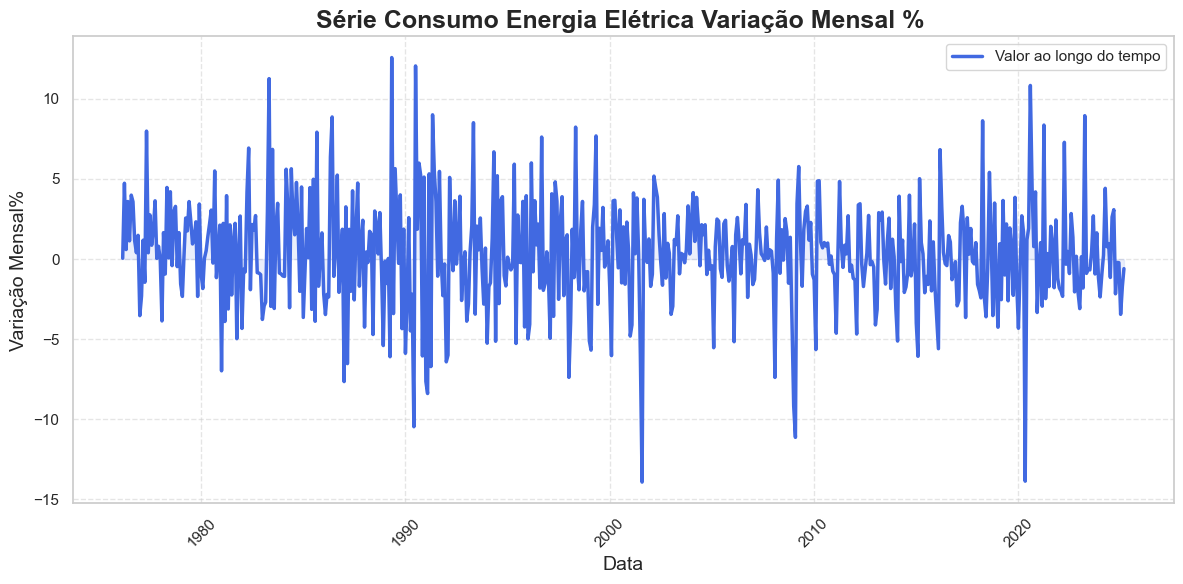

In [36]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_cons_EE["Mês"], df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_cons_EE["Mês"], df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série Consumo Energia Elétrica Variação Mensal % ', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [38]:
#Teste de ADF - Variação Mensal do Consumo de Energia Elétrica

resultado = adfuller(df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -6.554180
p-value: 0.000000
Valores Críticos:
	1%: -3.442
	5%: -2.867
	10%: -2.569


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do Consumo de Energia Elétrica - Variação Mensal não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [39]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"], model='additive', period = 12)

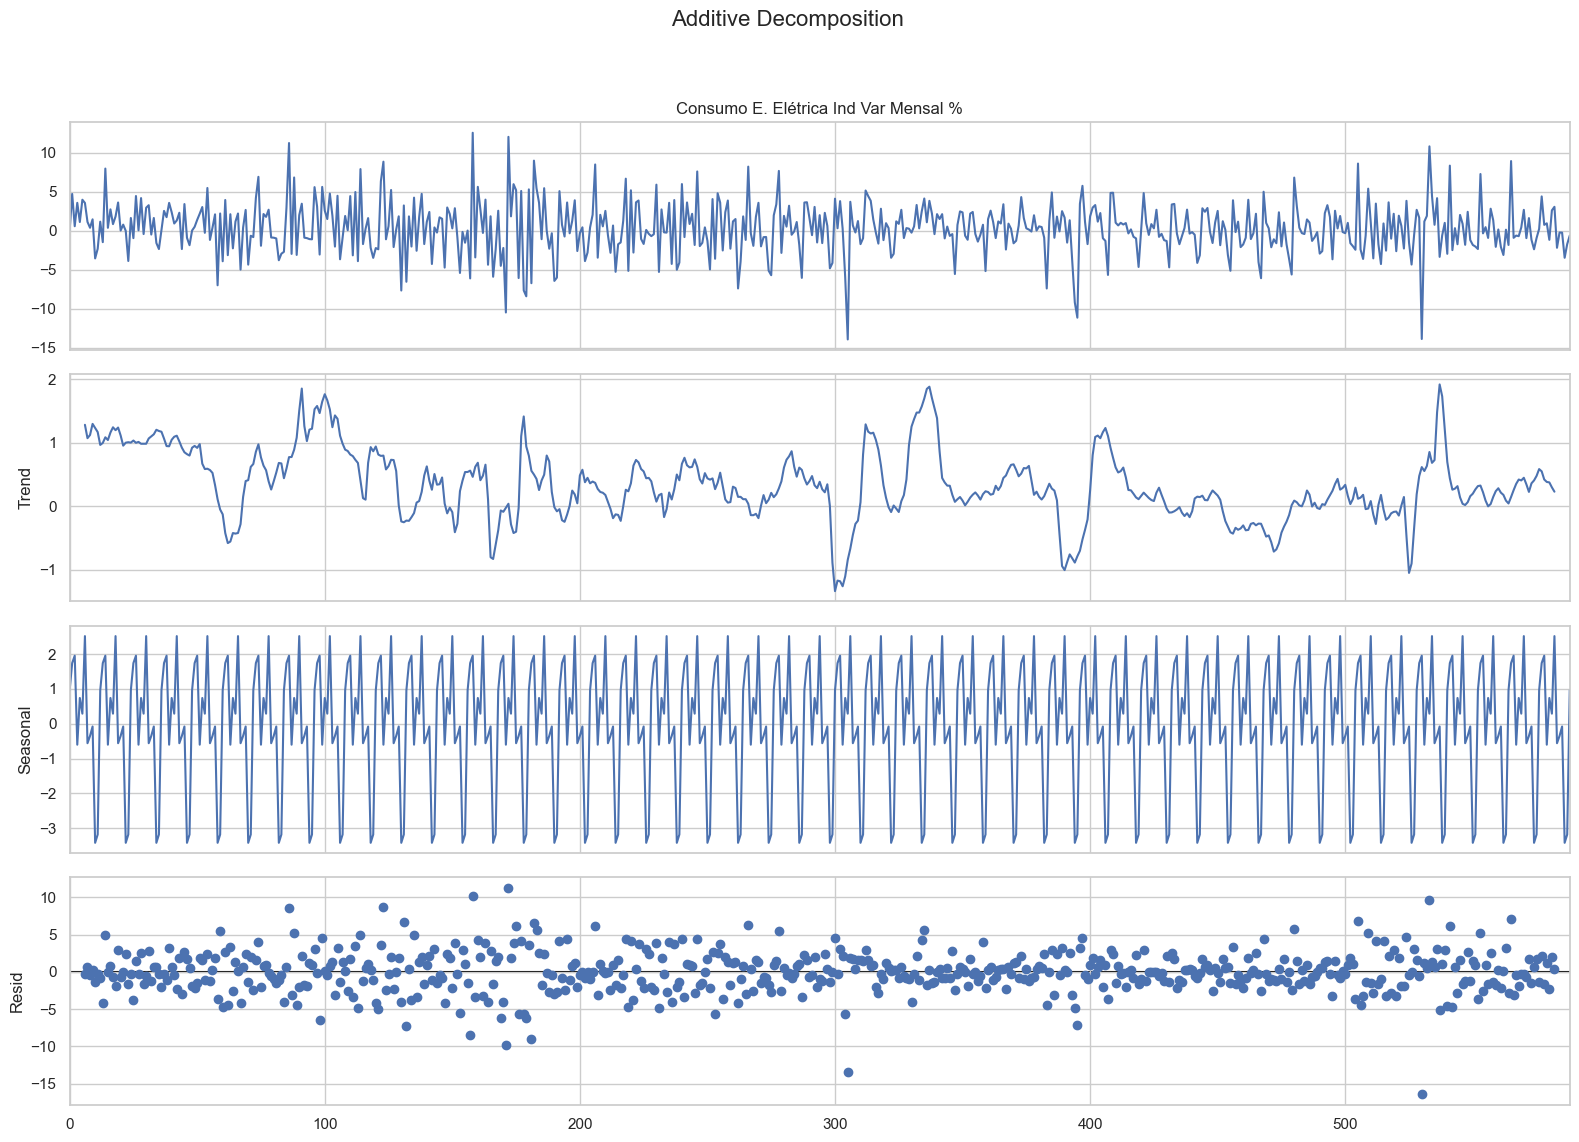

In [40]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

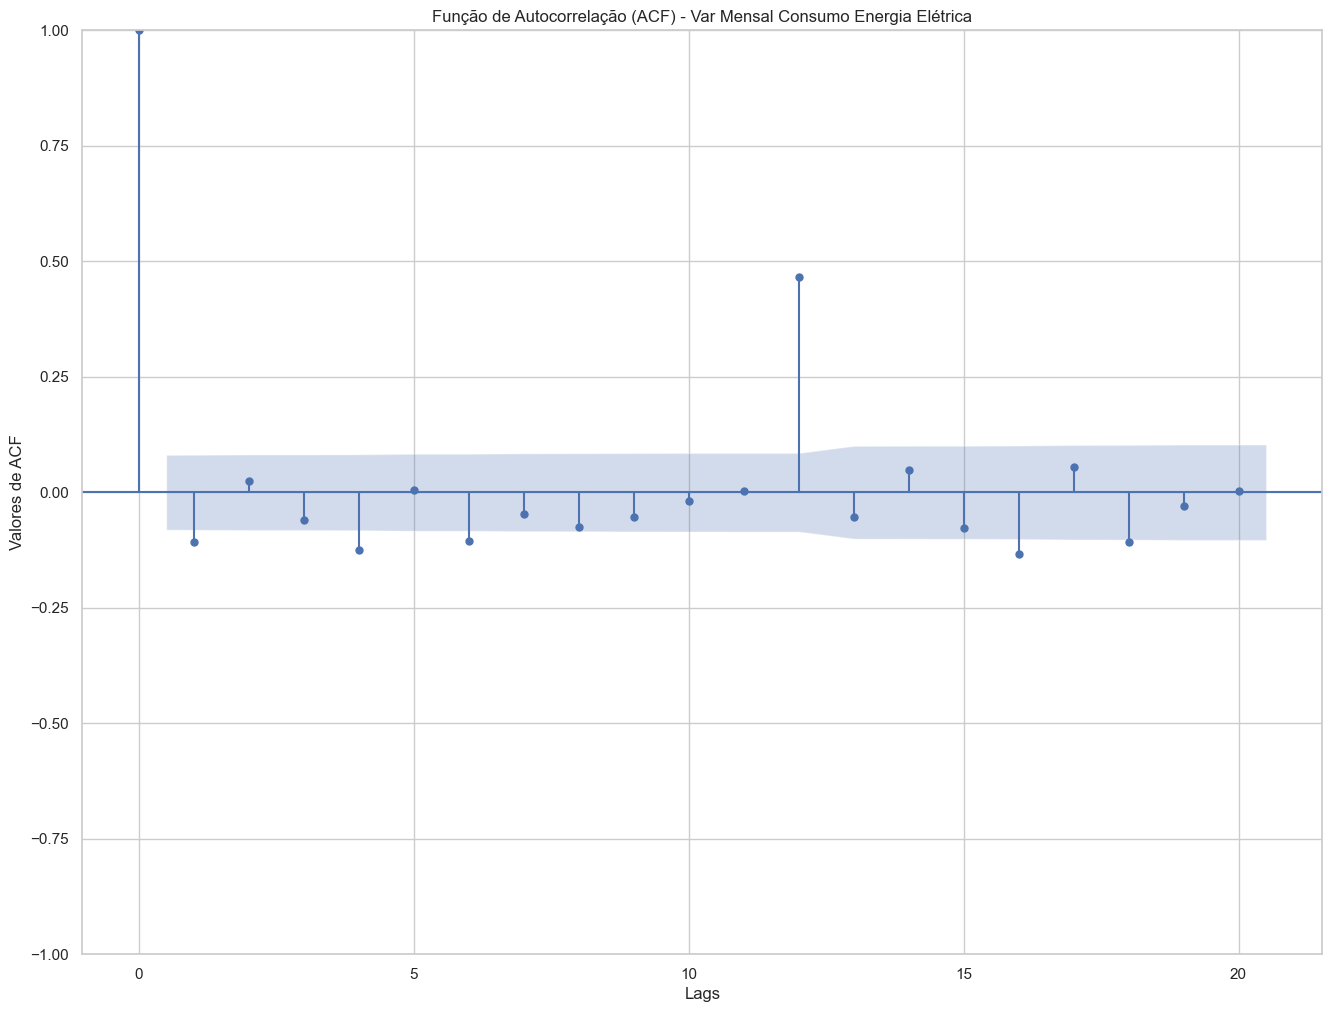

In [41]:
#Gráfico de ACF

plot_acf(df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal Consumo Energia Elétrica")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

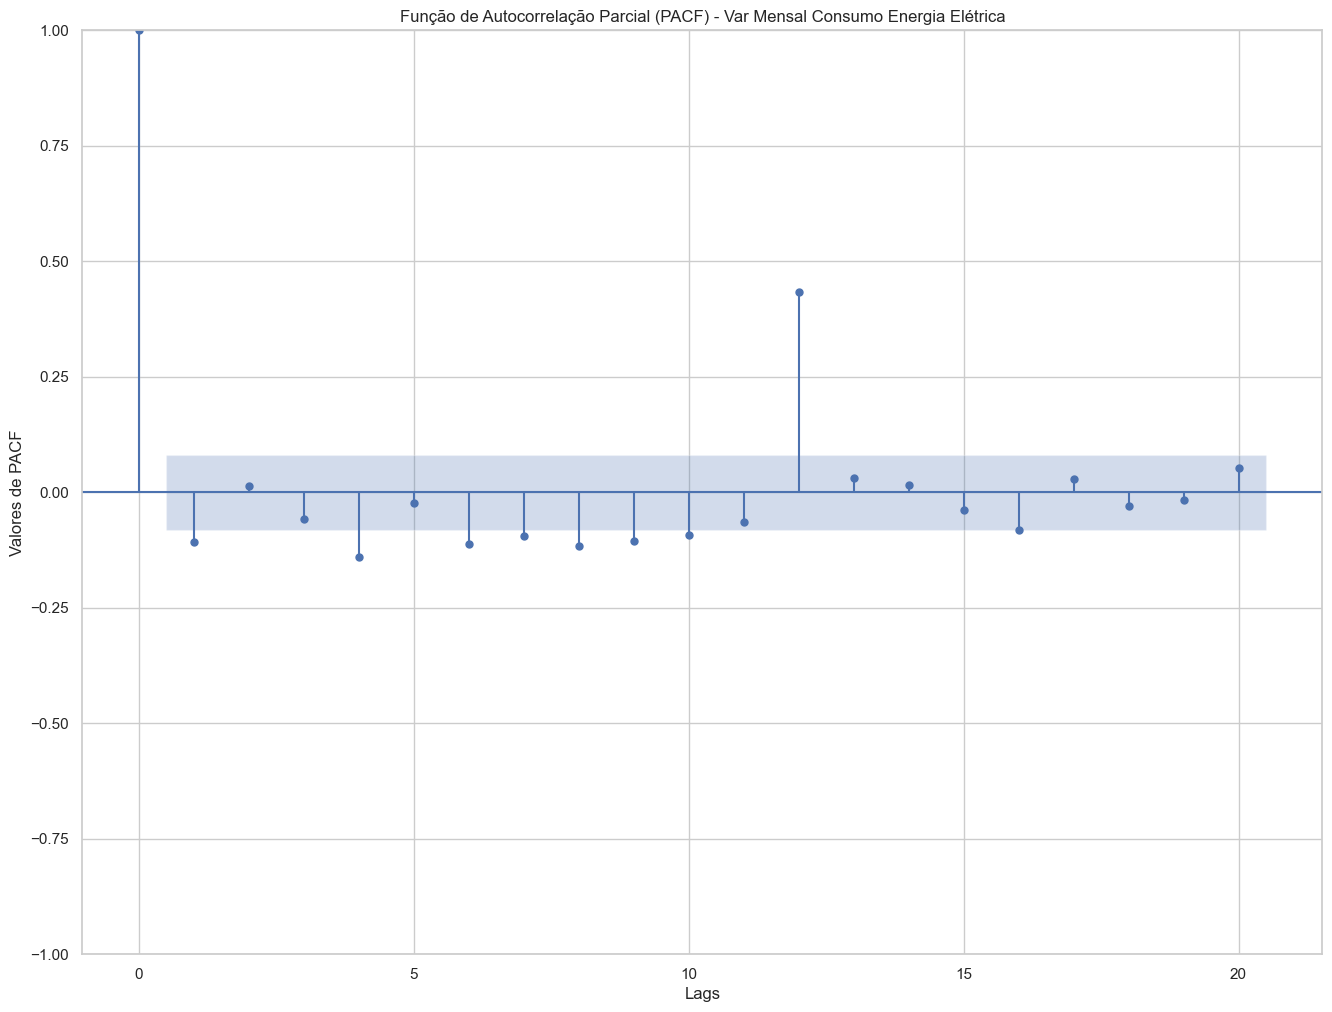

In [43]:
#Gráfico de PACF

plot_pacf(df_cons_EE["Consumo E. Elétrica Ind Var Mensal %"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal Consumo Energia Elétrica")
plt.xlabel("Lags")
plt.ylabel("Valores de PACF")
plt.show()

### Criação de base de dados em formato csv

In [44]:
df_cons_EE.to_csv("base_dados_cons_EE.csv", index=False)